In [1]:
import requests
from scrapy.http import TextResponse
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/11-15'
page = requests.get(url)
response = TextResponse(url=page.url,body=page.text,encoding="utf-8")

In [3]:
def rate_scraper(url):
    page = requests.get(url)
    response = TextResponse(url=page.url,body=page.text,encoding="utf-8")
    rate = pd.read_html(url, attrs={"id":"rb"})
    return rate

In [4]:
july_urls = ['http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/0{}/11-15'.format(i) for i in range(1,10)] + ['http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/{}/11-15'.format(i) for i in range(10,15)]

In [5]:
july_urls

['http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/02/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/03/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/04/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/05/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/06/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/07/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/08/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/09/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/10/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/11/11-15',
 'http://rate.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/12/11-15',
 'ht

In [8]:
july_rates = [] 
for i in range(len(july_urls)):
    july_rates.append(rate_scraper(july_urls[i]))

# 3-2

In [11]:
avg_buy_per_day = []
for i in range(len(july_rates)):
    avg_buy_per_day.append((july_rates[i][0].iloc[:,5])[2:19].apply(pd.to_numeric, errors = "coerce").mean())

In [12]:
avg_buy_per_day

[475.30882352941177,
 475.20588235294116,
 475.2647058823529,
 475.3235294117647,
 475.29411764705884,
 475.29411764705884,
 475.29411764705884,
 475.3235294117647,
 475.2352941176471,
 475.25,
 475.1470588235294,
 475.13235294117646,
 475.1764705882353,
 475.1764705882353]

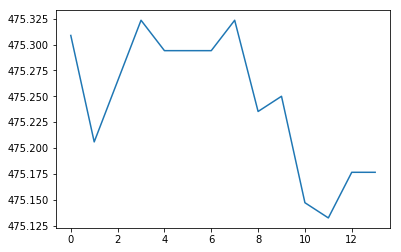

In [13]:
plt.plot(avg_buy_per_day)

In [14]:
avg_sell_per_day= []
for i in range(len(july_rates)):
    avg_sell_per_day.append((july_rates[i][0].iloc[:,6])[2:19].apply(pd.to_numeric, errors = "coerce").mean())

In [15]:
avg_sell_per_day

[478.61764705882354,
 478.5,
 478.47058823529414,
 478.47058823529414,
 478.52941176470586,
 478.52941176470586,
 478.52941176470586,
 478.5,
 478.3529411764706,
 478.38235294117646,
 478.3382352941176,
 478.27941176470586,
 478.3529411764706,
 478.3529411764706]

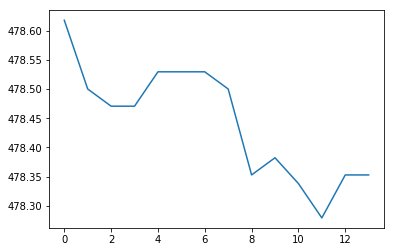

In [16]:
plt.plot(avg_sell_per_day)

# 3-1

In [23]:
all_rates = pd.concat((july_rates[i][0]).iloc[2:19,:] for i in range(len(july_urls)))

In [26]:
avg_period_buy = all_rates.iloc[:,5].apply(pd.to_numeric, errors = "coerce").mean()

In [27]:
avg_period_buy

475.2447478991597

In [28]:
avg_period_sell = all_rates.iloc[:,6].apply(pd.to_numeric, errors = "coerce").mean()

In [29]:
avg_period_sell

478.4432773109244